In [1]:
suppressMessages(library(rwwa))

# PET

## Obs

In [136]:
# load GMST data
gmst <- read.table("gmst.txt", col.names = c("year", "gmst"))

cov_2011 <- gmst[gmst$year == 2011,"gmst",drop = F]
cov_2024 <- gmst[gmst$year == 2024,"gmst",drop = F]
cov_pi <- cov_2024 - 1.3

In [137]:
cpc <- merge(load_ts("CPC_pet_HoA.dat", col.names = c("year", "pet")), gmst); cpc$pet <- cpc$pet * 92
era5 <- merge(load_ts("ERA5_pet_HoA.dat", col.names = c("year", "pet")), gmst); era5$pet <- era5$pet * 92

era5 <- era5[era5$year >= 1979,]

In [139]:
res_cpc2011 <- boot_ci(fit_ns("norm", "shift", cpc[cpc$year <= 2011,], "pet", c("gmst"), lower = F), cov_f = cov_2011, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_cpc2011, "res/res_pet_cpc_2011.csv")

res_cpc2024 <- boot_ci(fit_ns("norm", "shift", cpc[cpc$year <= 2024,], "pet", c("gmst"), lower = F), cov_f = cov_2024, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_cpc2024, "res/res_pet_cpc_2024.csv")

res_era52011 <- boot_ci(fit_ns("norm", "shift", era5[era5$year <= 2011,], "pet", c("gmst"), lower = F), cov_f = cov_2011, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_era52011, "res/res_pet_era5_2011.csv")

res_era52024 <- boot_ci(fit_ns("norm", "shift", era5[era5$year <= 2024,], "pet", c("gmst"), lower = F), cov_f = cov_2024, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_era52024, "res/res_pet_era5_2024.csv")

In [140]:
obs_res <- data.frame(t(sapply(list.files("res", pattern = "pet", full.names = T), function(fnm) {
    res <- read.csv(fnm, row.names = "X")
    unlist(lapply(rownames(res), function(cnm) setNames(res[cnm,], paste(gsub("_", "-", cnm), c("est", "lower", "upper"), sep = "_"))))
})))
rownames(obs_res) <- sapply(rownames(obs_res), function(rnm) paste0(strsplit(gsub(".csv", "", rnm), "_")[[1]][3:4], collapse = "_"))
                            
write.csv(obs_res, paste0("res-obs_pet.csv"))

### Check model fit

In [138]:
mdl_cpc <- fit_ns("norm", "shift", cpc, "pet", c("gmst"), lower = F, ev_year = 2011)
mdl_era5 <- fit_ns("norm", "shift", era5, "pet", c("gmst"), lower = F, ev_year = 2011)

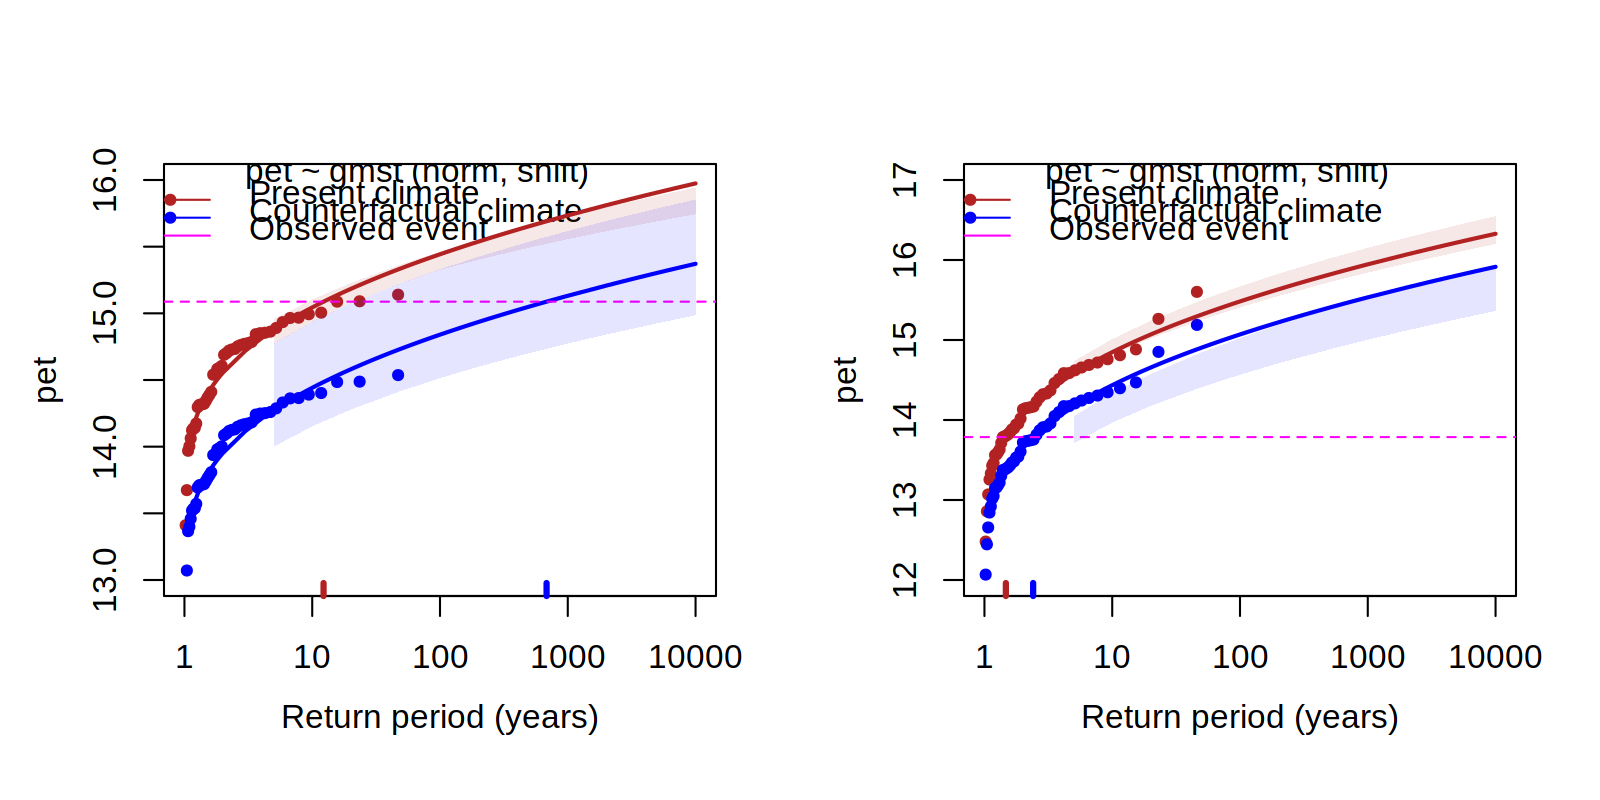

In [64]:
prep_window(c(1,2))

plot_returnlevels(mdl_era5, nsamp = 5, cov_f = cov_2011, cov_cf = cov_pi)
plot_returnlevels(mdl_cpc, nsamp = 5, cov_f = cov_2011, cov_cf = cov_pi)

# Precip

## Obs

In [144]:
# load GMST data
gmst <- read.table("gmst.txt", col.names = c("year", "gmst"))

cov_2011 <- gmst[gmst$year == 2011,"gmst",drop = F]
cov_2024 <- gmst[gmst$year == 2024,"gmst",drop = F]
cov_pi <- cov_2024 - 1.3

In [145]:
chirps <- merge(read.csv("~/00_WWA_project_folder/ephemeral/Somali-Drought/obs/dats/MAM_CHIRPS_precip.csv", col.names = c("year", "pr")), gmst)
era5 <- merge(read.csv("~/00_WWA_project_folder/ephemeral/Somali-Drought/obs/dats/MAM_ERA5_precip.csv", col.names = c("year", "pr")), gmst)
cpc <- merge(read.csv("~/00_WWA_project_folder/ephemeral/Somali-Drought/obs/dats/MAM_CPC_precip.csv", col.names = c("year", "pr")), gmst)

era5 <- era5[era5$year >= 1979,]

chirps$pr <- log(chirps$pr)
era5$pr <- log(era5$pr)
cpc$pr <- log(cpc$pr)

In [146]:
res_cpc2011 <- boot_ci(fit_ns("norm", "shift", cpc[cpc$year <= 2011,], "pr", c("gmst"), lower = T), cov_f = cov_2011, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_cpc2011, "res/res_logpr_cpc_2011.csv")

res_cpc2024 <- boot_ci(fit_ns("norm", "shift", cpc[cpc$year <= 2024,], "pr", c("gmst"), lower = T), cov_f = cov_2024, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_cpc2024, "res/res_logpr_cpc_2024.csv")

res_era52011 <- boot_ci(fit_ns("norm", "shift", era5[era5$year <= 2011,], "pr", c("gmst"), lower = T), cov_f = cov_2011, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_era52011, "res/res_logpr_era5_2011.csv")

res_era52024 <- boot_ci(fit_ns("norm", "shift", era5[era5$year <= 2024,], "pr", c("gmst"), lower = T), cov_f = cov_2024, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_era52024, "res/res_logpr_era5_2024.csv")

res_chirps2011 <- boot_ci(fit_ns("norm", "shift", chirps[chirps$year <= 2011,], "pr", c("gmst"), lower = T), cov_f = cov_2011, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_chirps2011, "res/res_logpr_chirps_2011.csv")

res_chirps2024 <- boot_ci(fit_ns("norm", "shift", chirps[chirps$year <= 2024,], "pr", c("gmst"), lower = T), cov_f = cov_2024, cov_cf = cov_pi, nsamp = 1000)
write.csv(res_chirps2024, "res/res_logpr_chirps_2024.csv")

In [147]:
obs_res <- data.frame(t(sapply(list.files("res", pattern = "logpr", full.names = T), function(fnm) {
    res <- read.csv(fnm, row.names = "X")
    unlist(lapply(rownames(res), function(cnm) setNames(res[cnm,], paste(gsub("_", "-", cnm), c("est", "lower", "upper"), sep = "_"))))
})))
rownames(obs_res) <- sapply(rownames(obs_res), function(rnm) paste0(strsplit(gsub(".csv", "", rnm), "_")[[1]][3:4], collapse = "_"))
                            
write.csv(obs_res, paste0("res-obs_logpr.csv"))

### Check model fit

In [101]:
mdl_cpc <- fit_ns("norm", "shift", cpc, "log_pr", c("gmst"), lower = T, ev_year = 2011)
mdl_era5 <- fit_ns("norm", "shift", era5, "log_pr", c("gmst"), lower = T, ev_year = 2011)
mdl_chirps <- fit_ns("norm", "shift", chirps, "log_pr", c("gmst"), lower = T, ev_year = 2011)

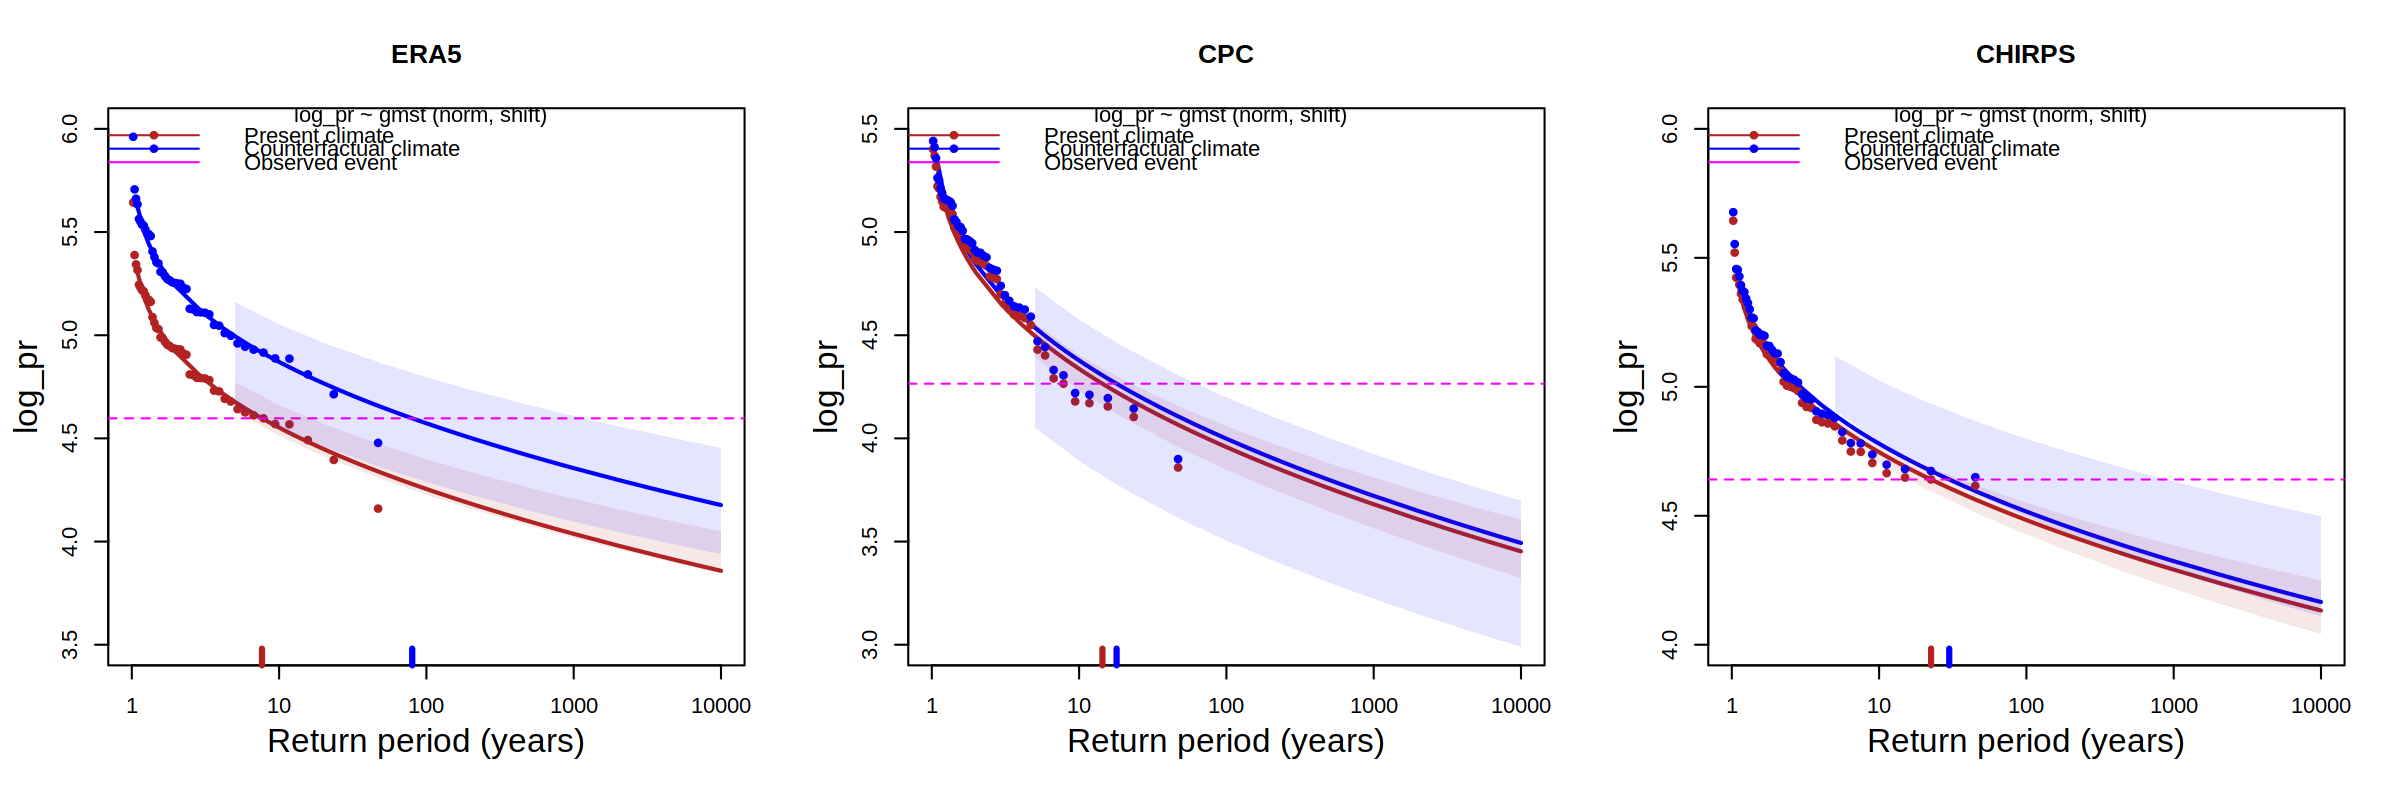

In [102]:
prep_window(c(1,3))

plot_returnlevels(mdl_era5, nsamp = 5, cov_f = cov_2011, cov_cf = cov_pi, main = "ERA5")
plot_returnlevels(mdl_cpc, nsamp = 5, cov_f = cov_2011, cov_cf = cov_pi, main = "CPC")
plot_returnlevels(mdl_chirps, nsamp = 5, cov_f = cov_2011, cov_cf = cov_pi, main = "CHIRPS")